<a href="https://colab.research.google.com/github/monteroanibal/diplomado_GEOIA_IGAC2025/blob/main/unidad_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook de la sesión

---

# 1. Cargue de librerías

Estas librerías permiten explorar los archivos en el entorno de Colab.

In [1]:
import glob
import os

Para importar shapefiles como GeoDataFrames. *Leafmap* para descargar datos de OpenStreetMap.

In [2]:
%%capture
!pip install leafmap=='0.20.0'
!pip install osmnx=='1.3.0'

In [3]:
import geopandas as gpd
import leafmap
#import osmnx as ox

Para poner de fondo el contexto de OpenStreetMap.

In [4]:
%%capture
!pip install contextily

In [5]:
import contextily as ctx

Paras utilizar los colores en el mapa cloroplético.

In [6]:
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt

Para rasterizar capas geométricas.

In [7]:
from osgeo import gdal, ogr, osr

Para generar resúmenes estadísticos de los rásters generados.

In [8]:
import numpy as np

# 2. Lectura y exploración de datos vectoriales



**<center> Importación </center>**

Se descargan los shapefiles que están publicados en un Github y se descomprimen en la sesión actual.

In [9]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Unidad_1_2_Datos/shapefiles.zip
!unzip -o /content/shapefiles.zip
!rm /content/shapefiles.zip

Para este ejemplo, cada shapefile representa una capa de información sobre el municipio de Nuquí. Se organizan las direcciones en orden alfabético.

In [10]:
ubicacion_shps = glob.glob(os.path.join("/content/shapefiles/","*.shp"))
ubicacion_shps = sorted(ubicacion_shps)
ubicacion_shps

['/content/shapefiles/Amb_Humedal.shp',
 '/content/shapefiles/Cent_Pob_nuqui.shp',
 '/content/shapefiles/coberturas_2010_2012.shp',
 '/content/shapefiles/comunidades_negras_tituladas.shp',
 '/content/shapefiles/nuqui_mpal.shp',
 '/content/shapefiles/resguardos_indigenas_legalizado.shp']

Cada shapefile consta de una tabla, donde cada fila representa un elemento en el espacio y cada columna representa un atributo de ese elemento. Se importan los shapefiles de interés, tomando como referencia la numeración de las direcciones desplegadas anteriormente. La numeración o indexación en Python arranca desde cero (0). Normalente se utiliza en encoding utf-8 para referir a que se están utilizando caracteres propios del idimoa español (letras con acentos).

In [11]:
nuqui_hume = gpd.read_file( ubicacion_shps[0], encoding='utf-8' ) # Humedales
nuqui_lulc = gpd.read_file( ubicacion_shps[2], encoding='utf-8' ) # Coberturas del suelo
nuqui_area = gpd.read_file( ubicacion_shps[4], encoding='utf-8' ) # Geometriia del municipio de Nuquii

La siguiente sentencia permite chequear el tipo de objeto al que apunta un nombre asignado.

In [12]:
type(nuqui_lulc)

geopandas.geodataframe.GeoDataFrame

**<center> Chequeo de la importación </center>**



Una primera aproximación a la revisión de si es ha importado una capa de información de forma correcta es dibujándola mediante el método *plot()* aplicado directamente al objeto GeoDataFrame.

In [13]:
nuqui_area

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,Shape_Leng,Shape_Area,geometry
0,1768,27495,Nuquí,704.583366,None,1,5,“No es apropiada su aplicación para la ubicaci...,Chocó,270334.189583,7.045834e+08,"POLYGON ((4525086.301 2223344.371, 4525092.458..."


<Axes: >

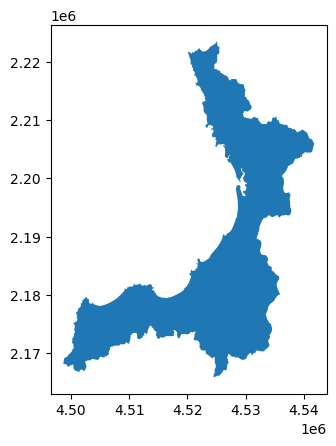

In [14]:
nuqui_area.plot()

El siguiente comando despliega el metadato del sistema de coordenadas de referencia sobre el que están proyectados los objetos del shapefile.

In [15]:
nuqui_area.crs

<Projected CRS: PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["MAGN ...>
Name: MAGNA-SIRGAS_Origen-Nacional
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Marco Geocentrico Nacional de Referencia
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Se reproyecta la capa al sistema de coordenadas con código 3857 con el fin de poder utilizar los mapas de fondo de OpenStreetMap.

In [16]:
nuqui_hume = nuqui_hume.to_crs(epsg=3857)
nuqui_lulc = nuqui_lulc.to_crs(epsg=3857)
nuqui_area = nuqui_area.to_crs(epsg=3857)

Se chequea de nuevo el nuevo sistema de coordenadas sobre el que se reproyectaron las capas de información.

In [17]:
nuqui_area.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

A continuación, se muestra la demarcación espacial del municipio de Nuquí y con ayuda del mapa de fondo.

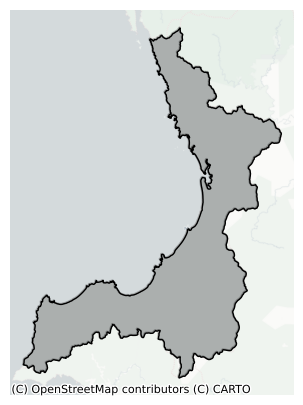

In [18]:
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_area.plot(ax=ax, color='#abafae', alpha=1, edgecolor="black")
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Al llamar el nombre de los GeoDataFrames sobre los que se importaron las capas de información, Colab despliega los primeros y últimos registros de las capas de información que sea llamada.

In [19]:
nuqui_hume

,Nivel_Hume,Area_Ha,Fecha_Ingr,Fecha_Reco,NOMAH,NOMZH,NOMSZH,Grado_Tran,geometry
0,2,727.503672,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"POLYGON ((-8605258.98 664590.975, -8605258.923..."
1,2,1.590278,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"MULTIPOLYGON (((-8604027.708 661085.072, -8604..."
2,1,0.000721,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601697.467 655698.379, -8601..."
3,1,0.092073,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601376.298 655497.838, -8601..."
4,1,0.132748,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601678.268 655772.275, -8601..."
...,...,...,...,...,...,...,...,...,...
443,2,0.802682,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Sin informacion e,"MULTIPOLYGON (((-8614435.802 626600.03, -86144..."
444,1,1.626985,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8611854.981 625137.153, -8611..."
445,1,129.231906,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8604679.686 632619.207, -8604..."
446,1,0.000977,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8602224.933 636138.423, -8602..."


La capa *nuqui_area* contiene solo un polígono que delimita el respectivo municipio.

In [20]:
nuqui_area

,OBJECTID,MpCodigo,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,Shape_Leng,Shape_Area,geometry
0,1768,27495,Nuquí,704.583366,None,1,5,“No es apropiada su aplicación para la ubicaci...,Chocó,270334.189583,7.045834e+08,"POLYGON ((-8603781.515 669641.052, -8603774.53..."


In [21]:
nuqui_hume.head()

,Nivel_Hume,Area_Ha,Fecha_Ingr,Fecha_Reco,NOMAH,NOMZH,NOMSZH,Grado_Tran,geometry
0,2,727.503672,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"POLYGON ((-8605258.98 664590.975, -8605258.923..."
1,2,1.590278,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,Natural,"MULTIPOLYGON (((-8604027.708 661085.072, -8604..."
2,1,0.000721,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601697.467 655698.379, -8601..."
3,1,0.092073,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601376.298 655497.838, -8601..."
4,1,0.132748,2020-08-28,NaT,Pacifico,Pacífico - Directos,Directos Pacifico Frontera Panamá,-,"MULTIPOLYGON (((-8601678.268 655772.275, -8601..."


A continuación, se muestra la demarcación espacial de los humedales con ayuda del mapa de fondo.

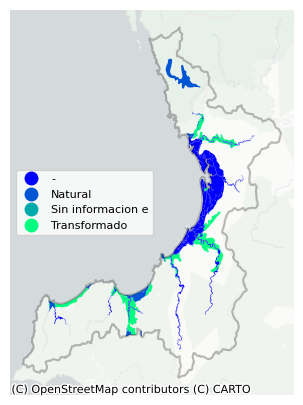

In [22]:
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_hume.plot(ax=ax,cmap='winter',alpha=1,column='Grado_Tran',legend=True, legend_kwds={'loc': 'center left', 'fontsize':8})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

**<center> Exploración de datos </center>**



La siguiente sentencia permite revisar el tipo de dato que almacena cada columna o atributo de la tabla de datos de los shapefiles importados.


In [23]:
nuqui_hume.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Nivel_Hume  448 non-null    int64         
 1   Area_Ha     448 non-null    float64       
 2   Fecha_Ingr  448 non-null    datetime64[ms]
 3   Fecha_Reco  0 non-null      datetime64[ms]
 4   NOMAH       448 non-null    object        
 5   NOMZH       448 non-null    object        
 6   NOMSZH      448 non-null    object        
 7   Grado_Tran  448 non-null    object        
 8   geometry    448 non-null    geometry      
dtypes: datetime64[ms](2), float64(1), geometry(1), int64(1), object(4)
memory usage: 31.6+ KB


Teniendo en cuenta que la capa *nuqui_hume* tiene un campo/columna/atributo/variable en el que se tiene precalculada el área de cada humedal, se puede aplicar a esta columna el método *describe()* para que despliegue estadísticas univariadas de esta variable.

In [24]:
nuqui_hume.Area_Ha.describe().round(3)

,Area_Ha
count,448.000
mean,22.781
std,83.780
min,0.000
25%,0.002
50%,0.530
75%,4.838
max,1098.710


*GeoPandas* permite calcular las áreas de cada polígono de la capa de información y la entrega en metros cuadrados, pero este cálculo depende del sistema de coordenadas de referencia sobre el que esté proyectada la capa. Obsérvese la diferencia entre la información de la tabla y lo calculado por Geopandas, sobre el tamaño promedio de los humedales en Nuquí.

In [25]:
( nuqui_hume.Area_Ha.describe()[1]*10000 ).round(3)

np.float64(227812.247)

In [26]:
nuqui_hume.area.mean().round(3)

np.float64(222498.009)

La capa de humedales refiere a un grado de transición de estos ecosistemas. Dado que esta variable es categórica, se pueden contar el número de humedales por cada grado de transición por medio del método *value_counts()*.

In [27]:
nuqui_hume.Grado_Tran.value_counts()

,count
Grado_Tran,
-,291
Transformado,91
Natural,57
Sin informacion e,9


Dado que existen valores en la columna 'Grado_Tran' sin información, se remplazan todos estos valores sin información bajo una misma etiqueta y con la ayuda de el método *loc()*.

In [28]:
nuqui_hume.loc[nuqui_hume['Grado_Tran'] == '-', 'Grado_Tran'] = 'Sin info.'
nuqui_hume.loc[nuqui_hume['Grado_Tran'] == 'Sin informacion e', 'Grado_Tran'] = 'Sin info.'

Se verifica el cambio.

In [29]:
nuqui_hume.Grado_Tran.value_counts()

,count
Grado_Tran,
Sin info.,300
Transformado,91
Natural,57


Se asigna un color a cada etiqueta al declarar un objero tipo diccionario y se despliega nuevamente el mapa cloroplético de humedales por niveles de transformación.

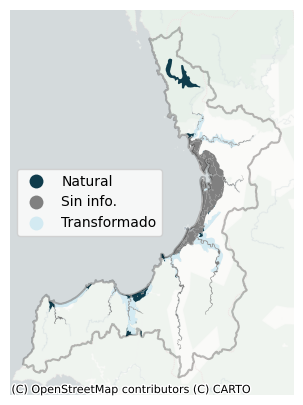

In [30]:
color_dict = {'Natural':'#0f3c4c', 'Sin info.':'grey', 'Transformado':'#d3eaf2'}
ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_hume.plot(ax=ax, column='Grado_Tran', cmap=mcolors.ListedColormap(list(color_dict.values())), legend=True, legend_kwds={'loc': 'center left'})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

A continuación, se explora la tabla de la capa de coberturas del municipio con ayuda del método *head()*.

In [31]:
nuqui_lulc.head(3)

,OBJECTID_1,OBJECTID,APOYO,CAMBIO,CONFIABILI,INSUMO,CODIGO,AREA_HA,LEYENDA3N,Shape_Leng,Shape_Le_1,Shape_Area,RULEID,geometry
0,86468,86527,None,1,Si,Landsat 1056 2010/08/24,411,25.085846,4.1.1. Zonas Pantanosas,0.022433,0.022433,0.000020,44,"POLYGON ((-8599862.902 635168.486, -8599848.89..."
1,86472,86531,None,4,Si,Landsat 1056 2010/08/24,521,3.706121,5.2.1. Lagunas costeras,0.020881,0.020881,0.000003,54,"MULTIPOLYGON (((-8602305.78 636302.25, -860234..."
2,86473,86532,None,1,Si,Landsat 1056 2010/08/24,423,16.593968,4.2.3. Sedimentos expuestos en bajamar,0.031021,0.031021,0.000014,49,"POLYGON ((-8599690.559 645682.467, -8599690.56..."


Se representa la capa de coberturas en un mapa. En el primer ejemplo, se utiliza una paleta de colores predeterminada y llamada *'gist_earth'*.

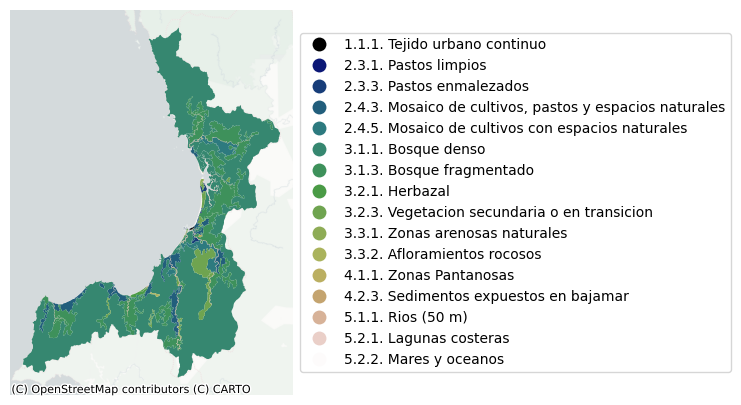

In [32]:
ax = nuqui_lulc.plot(figsize=(5,5), column='LEYENDA3N', legend=True, cmap='gist_earth', legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

Para mejorar la asignación correspondiente de colores a las diferentes coberturas, se asigna un código hexadecimal de color a cada cobertura mediante el uso de un diccionario de Python, que en la siguiente celda se ha llamado *'color_dict'*.

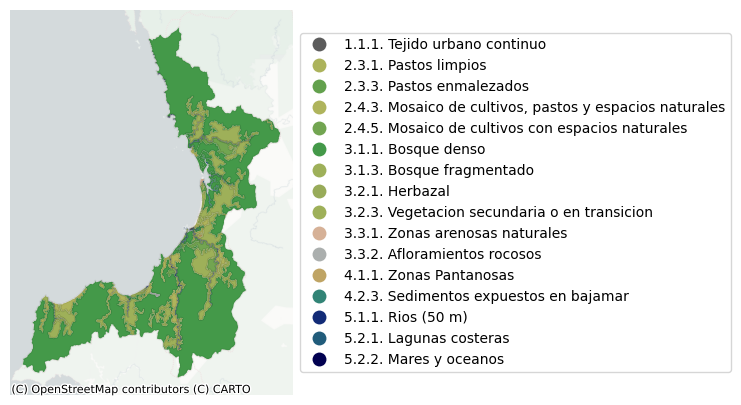

In [33]:
color_dict = {'1.1.1. Tejido urbano continuo': '#5c5c5c',
              '2.3.1. Pastos limpios': '#acb35b',
              '2.3.3. Pastos enmalezados': '#63a14d',
              '2.4.3. Mosaico de cultivos, pastos y espacios naturales': '#afb45c',
              '2.4.5. Mosaico de cultivos con espacios naturales': '#72a551',
              '3.1.1. Bosque denso': '#449949',
              '3.1.3. Bosque fragmentado': '#9eb059',
              '3.2.1. Herbazal': '#98ab59',
              '3.2.3. Vegetacion secundaria o en transicion': '#9eb059',
              '3.3.1. Zonas arenosas naturales': '#d6b197',
              '3.3.2. Afloramientos rocosos': '#abafae',
              '4.1.1. Zonas Pantanosas': '#bfa464',
              '4.2.3. Sedimentos expuestos en bajamar': '#328476',
              '5.1.1. Rios (50 m)': '#122b77',
              '5.2.1. Lagunas costeras': '#215c7b',
              '5.2.2. Mares y oceanos': '#020151'}

ax = nuqui_lulc.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.05)
nuqui_lulc.plot(ax=ax, column='LEYENDA3N', cmap=mcolors.ListedColormap(list(color_dict.values())), legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

A continuación. el método *sum()* aplicado al área precalculada y disponoble dentro del *GeoDataFrame* de coberturas, permite calcular el total de área de cada cobertura en el municipio, luego de utilizar el método *groupby()*.

In [34]:
nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum().round(3)

,AREA_HA
LEYENDA3N,
1.1.1. Tejido urbano continuo,19.754
2.3.1. Pastos limpios,7.600
2.3.3. Pastos enmalezados,141.599
"2.4.3. Mosaico de cultivos, pastos y espacios naturales",2899.302
2.4.5. Mosaico de cultivos con espacios naturales,1724.887
3.1.1. Bosque denso,1608639.490
3.1.3. Bosque fragmentado,10813.752
3.2.1. Herbazal,156.655
3.2.3. Vegetacion secundaria o en transicion,2271.439


Del mismo modo, se puede construir una expresión que calcule la proporción de área de cada cobertura en el municipio.

In [35]:
( nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum() / nuqui_lulc.AREA_HA.sum() ).round(3)

,AREA_HA
LEYENDA3N,
1.1.1. Tejido urbano continuo,0.000
2.3.1. Pastos limpios,0.000
2.3.3. Pastos enmalezados,0.000
"2.4.3. Mosaico de cultivos, pastos y espacios naturales",0.002
2.4.5. Mosaico de cultivos con espacios naturales,0.001
3.1.1. Bosque denso,0.988
3.1.3. Bosque fragmentado,0.007
3.2.1. Herbazal,0.000
3.2.3. Vegetacion secundaria o en transicion,0.001


Tal y como se observaba en el anterior resumen, casi la totalidad del área de Nuquí se compone de *Bosque denso*. A continuación, se representa esta información en un diagrama de barras.

<Axes: ylabel='LEYENDA3N'>

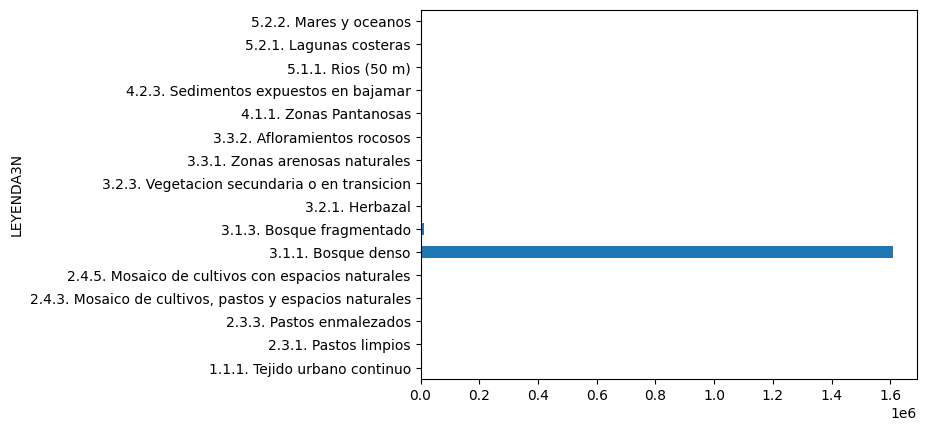

In [36]:
nuqui_lulc.groupby('LEYENDA3N').AREA_HA.sum().plot.barh()

**<center> Creación de nuevos campos en el GeoDataFrame  </center>**

Se llama una capa de multipolígonos sobre centros poblados y se realiza una primera visualización de estos. Se chequea tambíen la tabla de datos.

<Axes: >

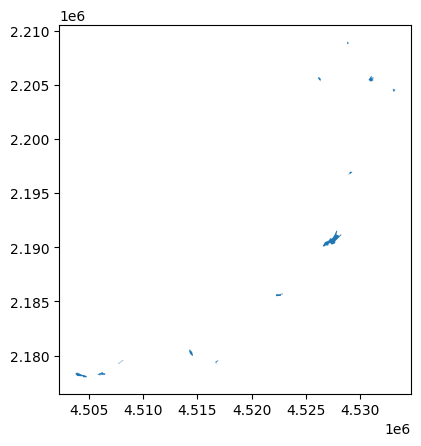

In [37]:
centros_poblados_nuqui = gpd.read_file( ubicacion_shps[1], encoding='utf-8' ) # centros poblados a nivel nacional
centros_poblados_nuqui.plot()

In [38]:
centros_poblados_nuqui.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,CLAS_CCDGO,CLAS_CCNCT,CLAS_NAREA,CLAS_VGNC,Shape_Leng,Shape_Area,OBJECTID,...,MpNombre,MpArea,MpNorma,MpCategor,MpAltitud,Restriccio,Depto,Shape_Le_1,Shape_Ar_1,geometry
0,27,495,27495,1,274951,0.722174,2021,0.053024,0.000059,1768,...,Nuquí,704.583366,None,1,5,“No es apropiada su aplicación para la ubicaci...,Chocó,270334.189583,7.045834e+08,"POLYGON ((4527958.225 2191132.73, 4527974.636 ..."
1,27,495,27495,2,274952,0.851539,2021,0.150744,0.000069,1768,...,Nuquí,704.583366,None,1,5,“No es apropiada su aplicación para la ubicaci...,Chocó,270334.189583,7.045834e+08,"MULTIPOLYGON (((4503866.475 2178418.073, 45038..."


Se genera un nuevo campo a partir de los valores categóricos de un campo del GeoDataFrame con el método *where* de numpy. Se chequean los resultados con ayuda de *value_counts*.

In [39]:
centros_poblados_nuqui['NOMBRE_CLASE'] = np.where(centros_poblados_nuqui['CLAS_CCDGO'] == '1', "Cabecera", "Centro poblado")
centros_poblados_nuqui.NOMBRE_CLASE.value_counts()

,count
NOMBRE_CLASE,
Cabecera,1
Centro poblado,1


**<center> Descarga de datos libres desde OpenSreetMap </center>**

Se pudo observar anteriormente que el *GeoDataFrame* de la capa de los límites del municipio de Nuquí contiene solamente un elemento en su tabla. Al llamar a su dato de tipo *geometría*, se obseva que este es un polígono, mediante el uso del método *type()*.

In [40]:
type( nuqui_area.to_crs(epsg=4326).geometry[0] )

shapely.geometry.polygon.Polygon

A continuación, se utiliza este polígono de los límites de Nuquí para construir un mapa que muestra los edificios que se encuentran dentro de este polígono y que hacen parte de la información libre disponible en *OpenStreetMap*.

In [ ]:
m = leafmap.Map(center=[nuqui_area.centroid.get_coordinates()['x'][0], nuqui_area.centroid.get_coordinates()['y'][0]], zoom=10, pitch=0, bearing=0)
m.add_osm_from_polygon(nuqui_area.to_crs(epsg=4326).geometry[0], tags = {'building': True} )
m

La siguiente celda guarda los datos de edificios desplegados anteriormente en un GeodataFrame llamado *nuqui_osmb*.

In [42]:
nuqui_osmb = leafmap.osm_gdf_from_polygon(nuqui_area.to_crs(epsg=4326).geometry[0], tags = {'building': True} )
nuqui_osmb.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 437 entries, ('way', np.int64(546918776)) to ('way', np.int64(1145160789))
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   amenity          10 non-null     object  
 1   geometry         437 non-null    geometry
 2   nodes            437 non-null    object  
 3   building         437 non-null    object  
 4   name             24 non-null     object  
 5   religion         2 non-null      object  
 6   aeroway          1 non-null      object  
 7   tourism          7 non-null      object  
 8   addr:postcode    1 non-null      object  
 9   addr:street      1 non-null      object  
 10  government       2 non-null      object  
 11  office           2 non-null      object  
 12  denomination     1 non-null      object  
 13  internet_access  1 non-null      object  
 14  shop             2 non-null      object  
 15  craft            1 non-null   

A continuación se muestra cómo se pueden filtrar los objetos de la capa de edificios, conservando solo aquellos que tienen dato en su campo *'name'*. Del mismo modo, se pueden filtrar los atributos/columnas de interés.

In [43]:
nuqui_osmb = nuqui_osmb.loc[nuqui_osmb['name'].notnull(), ['name','internet_access','geometry']]
nuqui_osmb

name internet_access  \
element_type osmid                                                         
way          570183748                        Biblioteca             NaN   
             570183750                           Iglesia             NaN   
             675282449               Estación de policía             NaN   
             675282451                          Nuquimar             NaN   
             675282453                        Arena Azul             NaN   
             675282480                    colegio IEELPN             NaN   
             675282493   Centro administrativo municipal             NaN   
             675282494                    Puerta del Sol             NaN   
             675282495                Biblioteca pública             NaN   
             675282496                   Pacífico Travel             NaN   
             677086207                Punto vive digital           wired   
             677086208                           Marimar             NaN   
             677086209                            Tienda             NaN   
             677086210                       Delfín Real             NaN   
             677086211                              Pola             NaN   
             677086212                    IPS Comfachocó             NaN   
             677086216       Juzgado promiscuo municipal             NaN   
             677086220                        Farmacosta             NaN   
             677086221  Notaria única del circuito Nuquí             NaN   
             723774701                   Bar playa terco             NaN   
             854798117                Tienda y Panadería             NaN   
             998259928               Cabanas Playa Terco             NaN   
             998260433               Cabanas Playa Terco             NaN   
             998260434               Cabanas Playa Terco             NaN   

                                                                 geometry  
element_type osmid                                                         
way          570183748  POLYGON ((-77.47488 5.59567, -77.47472 5.59564...  
             570183750  POLYGON ((-77.47467 5.59562, -77.47472 5.59544...  
             675282449  POLYGON ((-77.27103 5.70702, -77.27109 5.70715...  
             675282451  POLYGON ((-77.26421 5.7127, -77.26414 5.71279,...  
             675282453  POLYGON ((-77.26356 5.71282, -77.26365 5.71288...  
             675282480  POLYGON ((-77.2685 5.70819, -77.26819 5.7083, ...  
             675282493  POLYGON ((-77.26741 5.70875, -77.26754 5.7089,...  
             675282494  POLYGON ((-77.26579 5.71046, -77.26597 5.71065...  
             675282495  POLYGON ((-77.26737 5.70846, -77.26745 5.70834...  
             675282496  POLYGON ((-77.26608 5.70754, -77.26626 5.70765...  
             677086207  POLYGON ((-77.27023 5.70749, -77.27026 5.70756...  
             677086208  POLYGON ((-77.2672 5.70749, -77.26729 5.70767,...  
             677086209  POLYGON ((-77.26677 5.70803, -77.26686 5.70818...  
             677086210  POLYGON ((-77.26609 5.70968, -77.26617 5.70976...  
             677086211  POLYGON ((-77.2662 5.70958, -77.26626 5.70963,...  
             677086212  POLYGON ((-77.26727 5.70911, -77.26721 5.70916...  
             677086216  POLYGON ((-77.26741 5.70875, -77.26734 5.70865...  
             677086220  POLYGON ((-77.26647 5.70812, -77.26655 5.70817...  
             677086221  POLYGON ((-77.26621 5.70813, -77.26633 5.70821...  
             723774701  POLYGON ((-77.42885 5.61918, -77.42876 5.6191,...  
             854798117  POLYGON ((-77.47451 5.59602, -77.47445 5.59615...  
             998259928  POLYGON ((-77.42872 5.61888, -77.42867 5.61893...  
             998260433  POLYGON ((-77.42867 5.61884, -77.42862 5.61889...  
             998260434  POLYGON ((-77.42863 5.6188, -77.42858 5.61885,...

# 3.  Geoprocesamiento de datos vectoriales

**<center> Funciones geoespaciales usuales: CENTROIDES </center>**

<figure>
<center>
<img src='https://community.esri.com/legacyfs/online/13226_polys.JPG' width="300" height="300">
</center>
</figure>

A continuación, se calcula un centroide por cada polígono que representa un edificio en la tabla filtrada obtenida anteriormente.

In [44]:
centroides = nuqui_osmb.to_crs(epsg=9377).geometry.centroid
centroides

element_type  osmid    
way           570183748    POINT (4504122.947 2178197.297)
              570183750    POINT (4504140.517 2178185.457)
              675282449    POINT (4526843.549 2190382.591)
              675282451    POINT (4527608.463 2190996.296)
              675282453     POINT (4527673.232 2191020.43)
              675282480    POINT (4527139.388 2190499.578)
              675282493    POINT (4527248.777 2190579.863)
              675282494    POINT (4527418.129 2190763.702)
              675282495    POINT (4527232.124 2190528.923)
              675282496    POINT (4527382.131 2190438.844)
              677086207     POINT (4526933.702 2190430.05)
              677086208    POINT (4527262.252 2190431.682)
              677086209    POINT (4527311.819 2190489.163)
              677086210    POINT (4527390.265 2190672.457)
              677086211     POINT (4527376.51 2190657.092)
              677086212    POINT (4527287.038 2190606.969)
              677086216    POINT (4527254.702 2190561.807)
              677086220    POINT (4527345.351 2190499.639)
              677086221    POINT (4527370.235 2190498.605)
              723774701    POINT (4509253.414 2180767.934)
              854798117    POINT (4504165.576 2178250.569)
              998259928     POINT (4509264.56 2180737.279)
              998260433    POINT (4509269.499 2180732.642)
              998260434    POINT (4509273.741 2180728.365)
dtype: geometry

A continuación, se construye un GeoDataFrame en el que se toma el nombre de los edificios y se les relaciona la geometría de punto de sus centroides.

<Axes: >

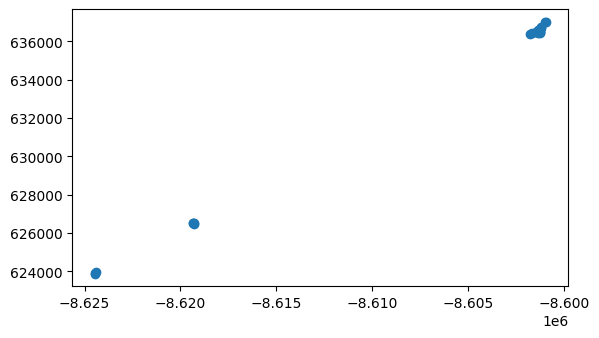

In [45]:
nuqui_osmb = gpd.GeoDataFrame({'nom_edif':nuqui_osmb.name, 'geometry':centroides}, crs='EPSG:9377').to_crs(epsg=3857)
nuqui_osmb.plot()

**<center> Funciones geoespaciales usuales: SPATIAL JOIN </center>**

<figure>
<center>
<img src='https://gisgeography.com/wp-content/uploads/2019/04/Spatial-Join.png' width="530" height="300">
</center>
</figure>

Con la ayuda del método *sjoin()* se puede asociar la información de la capa de coberturas a los puntos de los edificios, por supuesto, dependiendo de la cobertura sobre la que se encuentren estos puntos.

In [46]:
nuqui_lulc.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
nuqui_osmb = nuqui_osmb.sjoin(nuqui_lulc[['LEYENDA3N','geometry']], how="inner", predicate='intersects')

Como se observa en las dos siguientes celdas, 12 edificios se encuentran dentro de la cobertura *Tejido urbano continuo* mientras que otros 6 se encuentran en la cobertura 'Mosaico de cultivos, pastos y espacios naturales'.

In [48]:
nuqui_osmb

nom_edif  \
element_type osmid                                         
way          570183748                        Biblioteca   
             570183750                           Iglesia   
             675282449               Estación de policía   
             675282451                          Nuquimar   
             675282453                        Arena Azul   
             675282480                    colegio IEELPN   
             675282493   Centro administrativo municipal   
             675282494                    Puerta del Sol   
             675282495                Biblioteca pública   
             675282496                   Pacífico Travel   
             677086207                Punto vive digital   
             677086208                           Marimar   
             677086209                            Tienda   
             677086210                       Delfín Real   
             677086211                              Pola   
             677086212                    IPS Comfachocó   
             677086216       Juzgado promiscuo municipal   
             677086220                        Farmacosta   
             677086221  Notaria única del circuito Nuquí   

                                               geometry  index_right  \
element_type osmid                                                     
way          570183748  POINT (-8624456.303 623894.516)           53   
             570183750  POINT (-8624438.599 623882.702)           53   
             675282449   POINT (-8601766.16 636367.062)            5   
             675282451  POINT (-8601003.558 636992.419)           36   
             675282453  POINT (-8600938.777 637017.271)           36   
             675282480  POINT (-8601470.321 636487.394)            5   
             675282493  POINT (-8601361.207 636569.273)            5   
             675282494  POINT (-8601192.724 636756.154)           36   
             675282495   POINT (-8601377.53 636517.718)            5   
             675282496  POINT (-8601226.411 636427.894)           36   
             677086207  POINT (-8601676.095 636415.655)            5   
             677086208  POINT (-8601346.589 636419.764)            5   
             677086209  POINT (-8601297.304 636478.171)            5   
             677086210   POINT (-8601219.991 636663.82)            5   
             677086211  POINT (-8601233.672 636648.204)            5   
             677086212  POINT (-8601323.035 636596.927)            5   
             677086216   POINT (-8601355.13 636551.087)            5   
             677086220  POINT (-8601263.751 636488.999)            5   
             677086221  POINT (-8601238.786 636488.142)            5   

                                                                LEYENDA3N  
element_type osmid                                                         
way          570183748  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             570183750  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282449                      1.1.1. Tejido urbano continuo  
             675282451  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282453  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282480                      1.1.1. Tejido urbano continuo  
             675282493                      1.1.1. Tejido urbano continuo  
             675282494  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             675282495                      1.1.1. Tejido urbano continuo  
             675282496  2.4.3. Mosaico de cultivos, pastos y espacios ...  
             677086207                      1.1.1. Tejido urbano continuo  
             677086208                      1.1.1. Tejido urbano continuo  
             677086209                      1.1.1. Tejido urbano continuo  
             677086210                      1.1.1. Tejido urbano continuo  
             677086211                      1.1.1. Tejido 

In [49]:
nuqui_osmb.LEYENDA3N.value_counts()

,count
LEYENDA3N,
1.1.1. Tejido urbano continuo,13
"2.4.3. Mosaico de cultivos, pastos y espacios naturales",6


**<center> Funciones geoespaciales usuales: CLIP </center>**

<figure>
<center>
<img src='https://pro.arcgis.com/en/pro-app/latest/tool-reference/analysis/GUID-6B2D83BA-393A-4DDD-9402-071444A541AE-web.gif' width="600" height="240">
</center>
</figure>

Con la ayuda de *clip()* se genera un subconjunto de los registros del GeoDataFrame que se encuentren oincluidos dentro de los polígonos de otra capa. A continuación se realiza un clip de los cntros poblados de Nuqui.

In [50]:
clip_centros_poblados_nuqui = gpd.clip(centros_poblados_nuqui, nuqui_area.to_crs(epsg=9377), keep_geom_type=False)

<ipython-input-50-32f83904d9e0>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: PROJCS["MAGNA-SIRGAS_Origen-Nacional",GEOGCS["MAGN ...
Right CRS: EPSG:9377

  clip_centros_poblados_nuqui = gpd.clip(centros_poblados_nuqui, nuqui_area.to_crs(epsg=9377), keep_geom_type=False)


Se genera una representación gráfica del resultado.

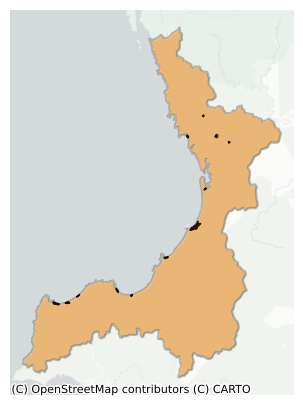

In [51]:
nuqui_area = nuqui_area.to_crs(epsg=3857)
clip_centros_poblados_nuqui = clip_centros_poblados_nuqui.to_crs(epsg=3857)

ax = nuqui_area.boundary.plot(figsize=(5,5), edgecolor='k', alpha=0.25)
nuqui_area.plot(ax=ax, color='#eab676', alpha=1, edgecolor="#eeeee4")
clip_centros_poblados_nuqui.plot(ax=ax,color='#21130d', alpha=1,edgecolor="#21130d")
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

**<center> Funciones geoespaciales usuales: BUFFER </center>**


<figure>
<center>
<img src='https://i0.wp.com/giscrack.com/wp-content/uploads/2019/10/Influence-zones.png?fit=762%2C409&ssl=1' width="500" height="260">
</center>
</figure>

A continuación, Extendemos un contorno alrededor del area de estudio de Nuquí visualmente con la definiciñon de un radio de 40000.

In [52]:
area_buffer_mpio = nuqui_area.buffer(40000)
area_buffer_mpio

,0
0,"POLYGON ((-8668947.753 621994.192, -8668747.87..."


Al dibujar el nuevo contorno se observa que el mapa de fondo se extiende a los alrededores de Nuquí, lo cual permite realizar un nuevo mapa de las ubicaciones de los centros poblados del municipio con un contexto más extenso.

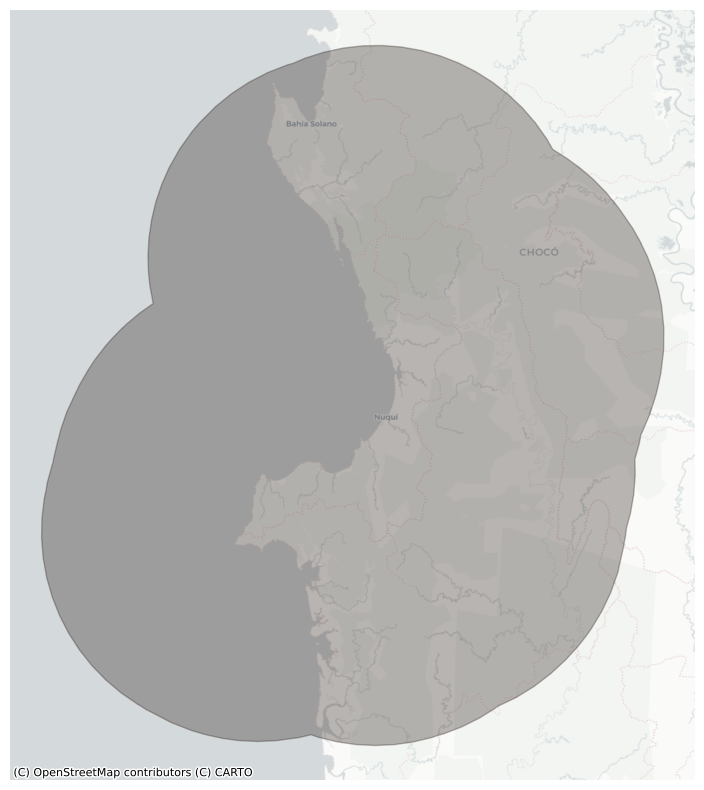

In [53]:
ax = area_buffer_mpio.boundary.plot(figsize=(10,10), edgecolor='k', alpha=0)
area_buffer_mpio.plot(ax=ax, color='#21130d', alpha=0.3, edgecolor="#21130d")
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

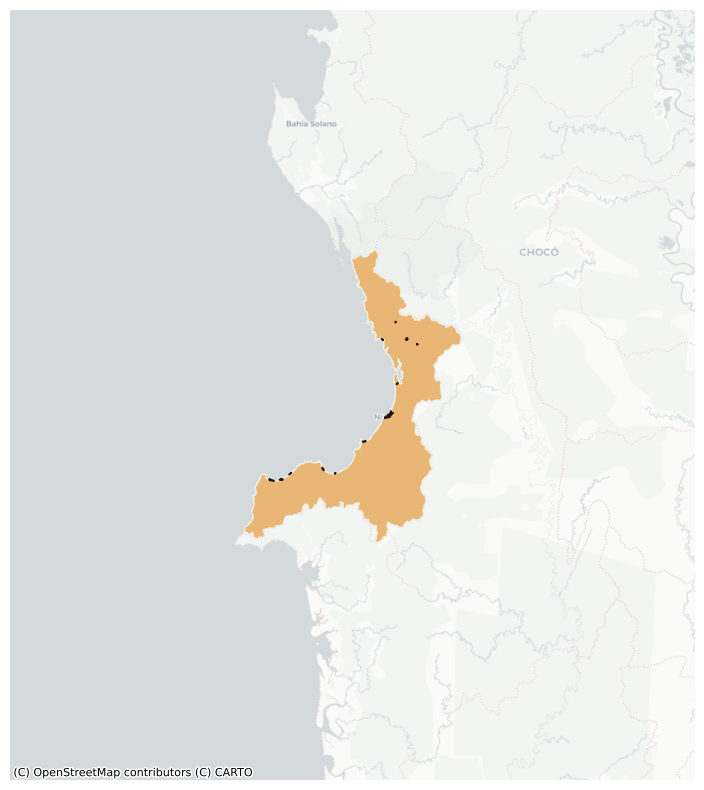

In [54]:
ax = area_buffer_mpio.boundary.plot(figsize=(10,10), edgecolor='k', alpha=0)
nuqui_area.plot(ax=ax, color='#eab676', alpha=1, edgecolor="#eeeee4")
clip_centros_poblados_nuqui.plot(ax=ax,color='#21130d', alpha=1,edgecolor="#21130d")
ax.set_axis_off()
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

**<center> Funciones geoespaciales usuales: OVERLAY </center>**

<figure>
<center>
<img src='https://i.ibb.co/rwYkzPc/Captura-de-Pantalla-2024-10-08-a-la-s-13-48-24.png' height="150">
</center>
</figure>

Se observa que existen cinco (5) resguardos en Nuquí. Se toma uno solo de ellos y se genera un nuevo objeto con ese solo resguardo.

<Axes: >

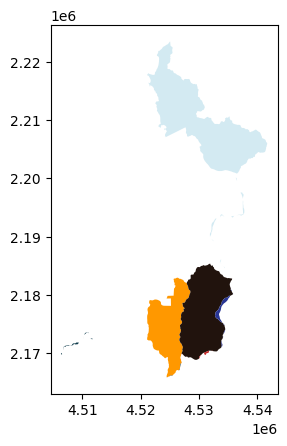

In [55]:
nuqui_resg = gpd.read_file( ubicacion_shps[5], encoding='utf-8' ) # Delimitacioon de resguardos de Nuquii
nuqui_resg['color'] = ['#FF9800','#d3eaf2','#21130d','#C62828', '#0f3c4c', '#283593']
nuqui_resg.plot(color=nuqui_resg['color'])

In [56]:
nuqui_hume_subc = nuqui_resg[:1][['geometry']].to_crs(epsg=3857).sjoin(nuqui_hume[['Grado_Tran','geometry']], how="inner", predicate='intersects')

Se hace cruce de información y de geometrías a partir de los diferentes predicados de overlay. Favor revisar las diferencias entre los cuatro (4) ejemplos de las tablas generadas.

In [57]:
interseccion_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='intersection')
interseccion_nuqui

<ipython-input-57-6c8de64a9a05>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 51 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  interseccion_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='intersection')


,color,index_right,Grado_Tran,geometry
0,#FF9800,118,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
1,#FF9800,328,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
2,#FF9800,120,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
3,#FF9800,202,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
4,#FF9800,119,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
5,#FF9800,315,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
6,#FF9800,320,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
7,#FF9800,323,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
8,#FF9800,133,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
9,#FF9800,194,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."


<Axes: >

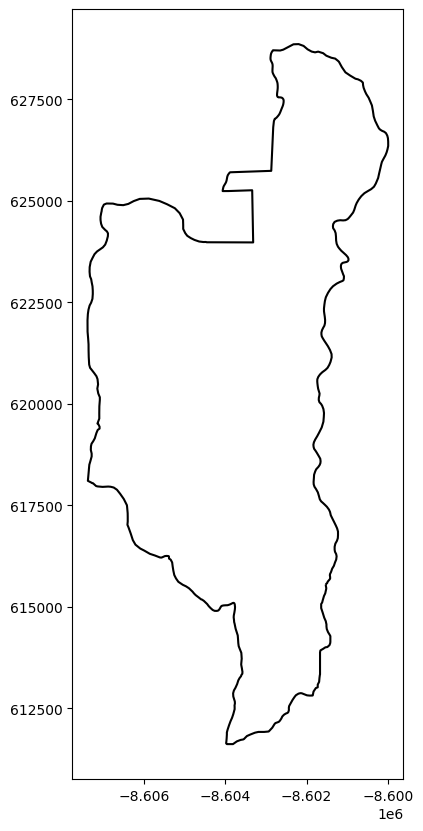

In [58]:
interseccion_nuqui[:1].boundary.plot(figsize=(10,10), edgecolor='k', alpha=1)

In [59]:
union_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='union')
union_nuqui

<ipython-input-59-bef99e1b01e4>:1: UserWarning: `keep_geom_type=True` in overlay resulted in 51 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  union_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='union')


,color,index_right,Grado_Tran,geometry
0,#FF9800,118.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
1,#FF9800,328.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
2,#FF9800,120.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
3,#FF9800,202.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
4,#FF9800,119.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
5,#FF9800,315.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
6,#FF9800,320.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
7,#FF9800,323.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
8,#FF9800,133.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."
9,#FF9800,194.0,Sin info.,"POLYGON Z ((-8601523.717 615553.022 0, -860152..."


<Axes: >

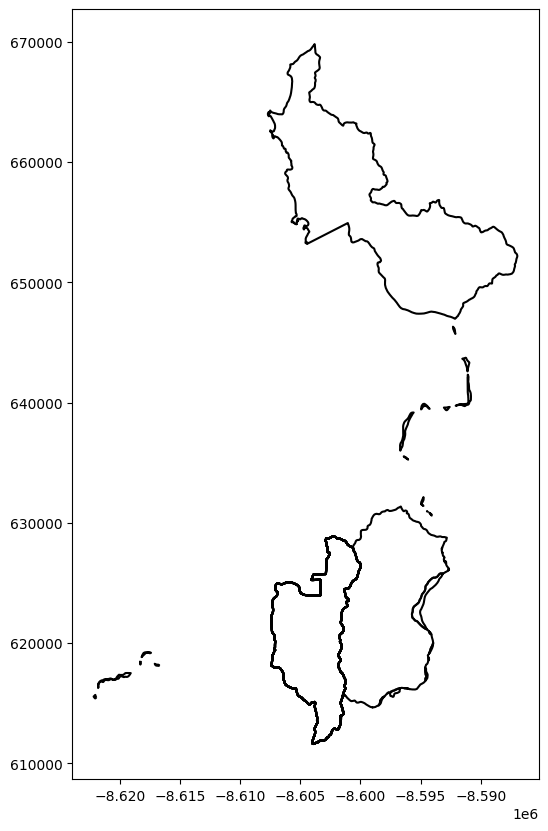

In [60]:
union_nuqui.boundary.plot(figsize=(10,10), edgecolor='k', alpha=1)

In [61]:
dif_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='difference')
dif_nuqui

,geometry,color
0,"MULTIPOLYGON Z (((-8603774.534 669538.098 0, -...",#d3eaf2
1,"POLYGON Z ((-8593227.11 627812.805 0, -8593227...",#21130d
2,"MULTIPOLYGON Z (((-8596299.673 616247.242 0, -...",#C62828
3,"MULTIPOLYGON Z (((-8601515.165 613985.835 0, -...",#0f3c4c
4,"MULTIPOLYGON Z (((-8593219.471 627834.553 0, -...",#283593


<Axes: >

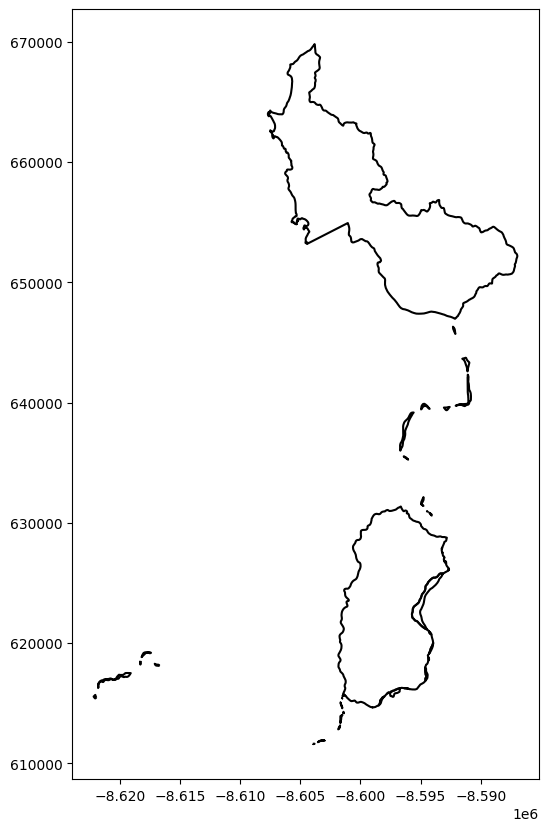

In [62]:
dif_nuqui.boundary.plot(figsize=(10,10), edgecolor='k', alpha=1)

In [63]:
simdif_nuqui = gpd.overlay(nuqui_resg[['geometry','color']].to_crs(epsg=3857), nuqui_hume_subc, how='symmetric_difference')
simdif_nuqui

,color,index_right,Grado_Tran,geometry
0,#d3eaf2,NaN,NaN,"MULTIPOLYGON Z (((-8603774.534 669538.098 0, -..."
1,#21130d,NaN,NaN,"POLYGON Z ((-8593227.11 627812.805 0, -8593227..."
2,#C62828,NaN,NaN,"MULTIPOLYGON Z (((-8596299.673 616247.242 0, -..."
3,#0f3c4c,NaN,NaN,"MULTIPOLYGON Z (((-8601515.165 613985.835 0, -..."
4,#283593,NaN,NaN,"MULTIPOLYGON Z (((-8593219.471 627834.553 0, -..."


<Axes: >

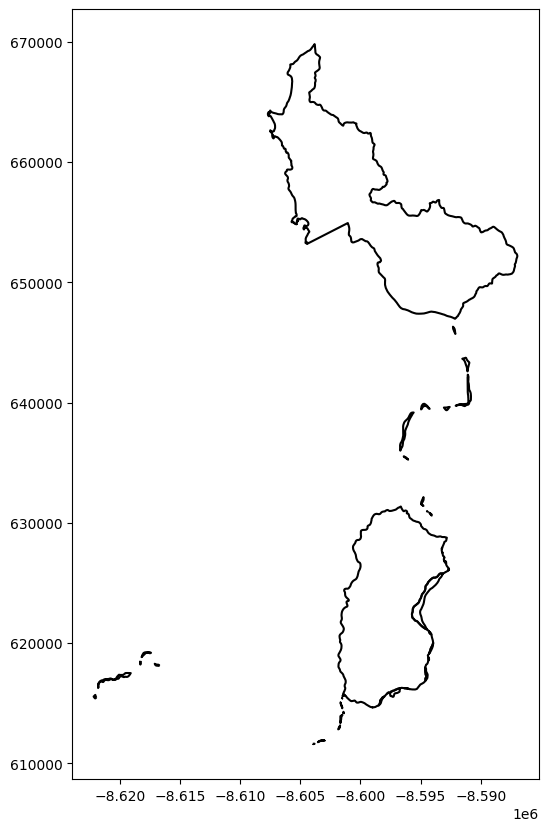

In [64]:
simdif_nuqui.boundary.plot(figsize=(10,10), edgecolor='k', alpha=1)

**<center> Funciones geoespaciales usuales: DISSOLVE </center>**

<figure>
<center>
<img src='https://www.earthdatascience.org/images/courses/earth-analytics/spatial-data/dissolve-polygons-esri.gif' height="200">
</center>
</figure>

A continuación, se toma como ejemplo la capa de resguardos para agrupar los diferentes polígonos en una capa de multipolígonos de dos (2) grupos. Revisar que los valores de los campos que se heredan son los que aparecen en la primer fila de cada grupo en la tabla de la capa original.

<Axes: >

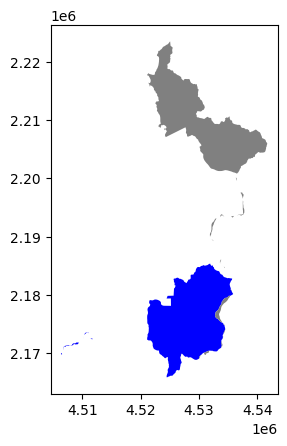

In [65]:
nuqui_resg['val_comun'] = [1,2,1,2,1,2]
nuqui_2grps_resguardos = nuqui_resg.dissolve(by='val_comun')
nuqui_2grps_resguardos.plot(color=['blue','grey'])

In [66]:
 nuqui_resg

,OBJECTID,ID_RESGUAR,NOMBRE_RES,TIPO_PROCE,CEDULA_CAT,MATRICULA_,TIPO_ACTO_,NUMERO_ACT,FECHA_ACTO,AREA_ACTO_,...,MUNICIPIO,RESPONSABL,AREA_RECON,RANGO_TOLE,CODIGO_REC,SHAPE_Leng,SHAPE_Area,geometry,color,val_comun
0,299,10326,Rio Pangui,LEGALIZACIÓN DECRETO 1071,None,186-910,RESOLUCIÓN,0088,1982-07-27,7870.0,...,27495,N/A,0.0,0,None,0.442793,0.005390,"POLYGON Z ((4526946.328 2169782.292 0, 4526934...",#FF9800,1
1,340,10333,"Rios Jurubida, Chori Y Alto Baudo",LEGALIZACIÓN DECRETO 1071,None,None,RESOLUCIÓN,0015,1982-04-21,80350.0,...,27025,N/A,0.0,0,None,1.669253,0.065259,"MULTIPOLYGON Z (((4525092.458 2223242.402 0, 4...",#d3eaf2,2
2,344,10324,Rio Nuqui,LEGALIZACIÓN DECRETO 1071,None,186-902,RESOLUCIÓN,0013,1982-04-21,9500.0,...,27495,N/A,0.0,0,None,0.440886,0.008084,"POLYGON Z ((4535705.722 2182742.187 0, 4535691...",#21130d,1
3,474,10332,"Rios Catru, Dubasa, Ankoso",LEGALIZACIÓN DECRETO 1071,None,None,RESOLUCIÓN,0014,1982-04-21,48980.0,...,27025,N/A,0.0,0,None,1.313273,0.046289,"MULTIPOLYGON Z (((4532377.432 2170363.53 0, 45...",#C62828,2
4,615,10327,Rio Pavasa Y Quebrada Jella,LEGALIZACIÓN DECRETO 1071,None,None,RESOLUCIÓN,0077,1993-04-14,15100.0,...,BAJO BAUDÓ,N/A,0.0,0,None,0.751785,0.011189,"MULTIPOLYGON Z (((4526916.451 2168194.139 0, 4...",#0f3c4c,1
5,674,10310,Puerto Alegre Y La Divisa,LEGALIZACIÓN DECRETO 1071,None,None,RESOLUCIÓN,0042,1988-07-21,22365.0,...,ALTO BAUDÓ,N/A,0.0,0,None,0.698391,0.017735,"MULTIPOLYGON Z (((4535303.068 2181869.525 0, 4...",#283593,2


In [67]:
nuqui_2grps_resguardos

,geometry,OBJECTID,ID_RESGUAR,NOMBRE_RES,TIPO_PROCE,CEDULA_CAT,MATRICULA_,TIPO_ACTO_,NUMERO_ACT,FECHA_ACTO,...,PUEBLO,DEPARTAMEN,MUNICIPIO,RESPONSABL,AREA_RECON,RANGO_TOLE,CODIGO_REC,SHAPE_Leng,SHAPE_Area,color
val_comun,,,,,,,,,,,,,,,,,,,,,
1,"MULTIPOLYGON Z (((4524527.631 2165858.366 0, 4...",299,10326,Rio Pangui,LEGALIZACIÓN DECRETO 1071,None,186-910,RESOLUCIÓN,0088,1982-07-27,...,Embera,CHOCÓ,27495,N/A,0.0,0,None,0.442793,0.005390,#FF9800
2,"MULTIPOLYGON Z (((4526944.267 2168223.327 0, 4...",340,10333,"Rios Jurubida, Chori Y Alto Baudo",LEGALIZACIÓN DECRETO 1071,None,None,RESOLUCIÓN,0015,1982-04-21,...,Embera,CHOCÓ,27025,N/A,0.0,0,None,1.669253,0.065259,#d3eaf2


**<center> Exportación de datos vectoriales </center>**

Se exporta al directorio raiz sobre el que se encuentran los *shapefiles* descargados inicialmente.

In [69]:
nuqui_2grps_resguardos.to_file('/content/shapefiles/nuqui_2grps_resguardos.shp')

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Field FECHA_ACTO create as date field, though DateTime requested.
  ogr_write(


# 4. Rasterización

A continuación, se genera un array a partir de una de las capas de información vectorial antes generada.

In [70]:
# Filename of input OGR file
train_fn = r'/content/shapefiles/nuqui_2grps_resguardos.shp'
train_ds = ogr.Open(train_fn)

# Filename of the raster Tiff that will be created
raster_fn = r'/content/shapefiles/nuqui_2grps_resguardos.tif'

# Open the data source and read in the extent
naip_fn = r'/content/shapefiles/nuqui_mask.tif'
naip_ds = gdal.Open(naip_fn)

#tipo formato, proyección y extensión del raster
lyr = train_ds.GetLayer()
driver = gdal.GetDriverByName('GTiff')
target_ds = driver.Create(raster_fn, naip_ds.RasterXSize, naip_ds.RasterYSize, 1, gdal.GDT_UInt16)
target_ds.SetGeoTransform(naip_ds.GetGeoTransform())
target_ds.SetProjection(naip_ds.GetProjection())
options = ['ATTRIBUTE=OBJECTID']

#Rasterizar y seleccionar numero de bandas
gdal.RasterizeLayer(target_ds, [1], lyr, options=options)

#Write data to band 1
data = target_ds.GetRasterBand(1).ReadAsArray()

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


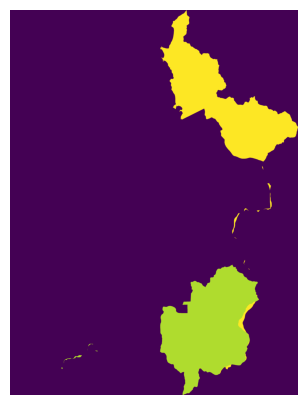

In [71]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
ax = plt.imshow(data)
plt.axis('off')
ax

Se puede explorar las frecuencias de los distintos valores de la banda generada del ráster.

<BarContainer object of 3 artists>

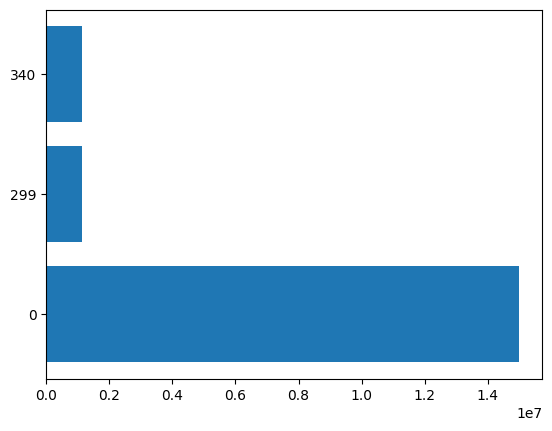

In [72]:
unique, counts = np.unique(data.ravel(), return_counts=True)
counts = list(counts)
unique = [str(x) for x in list(unique)]
plt.barh(unique, counts)

A continuación, se realiza una conversión de los valores del GeoTiff antes generado a valores binarios.

In [73]:
data = target_ds.GetRasterBand(1).ReadAsArray()
bin_data=np.where(data==0,0,1)

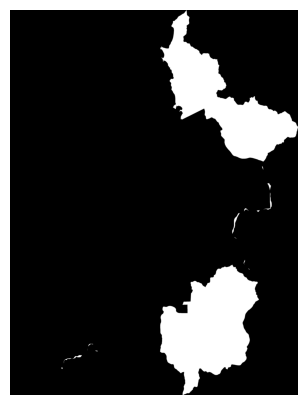

In [74]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
ax = plt.imshow(bin_data, cmap='binary_r' ) #binary
plt.axis('off')
ax